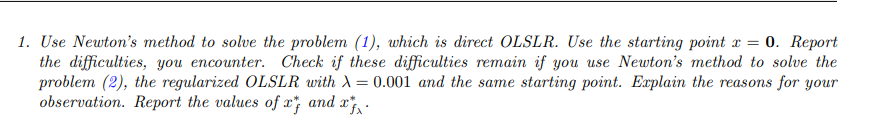

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:

from sklearn . datasets import load_digits
digits = load_digits ()

# check the shape of digits data
print ( digits . data . shape )
# check the shape of digits target
print ( digits . target . shape )
#let us use the linear regression used in the previous lab
#N = digits . data . shape [0] # Number of data points
#d = digits . data . shape [1] # Dimension of data points
A = digits . data
#In the following code , we create a NX1 vector of target labels
y = 1.0* np . ones ([ A . shape [0] ,1])
for i in range ( digits . target . shape [0]) :
  y [ i ] = digits . target [ i ]


(1797, 64)
(1797,)


In [ ]:
def f(x,A,y):
  return np.linalg.norm(A@x-y)**2/2

def grad_f(x,A,y):
  return (A.transpose()@A)@x - A.transpose()@y

def hessian(x,A):
  return A.transpose()@A
rho=0.5
def get_alpha_with_scaling(xk,A,y, rho, Dk):
  alpha = 0.99
  gamma=0.5
  pk = -grad_f(xk,A,y)
  while f(xk + alpha*Dk@pk,A,y) > (f(xk,A,y) + gamma*alpha*grad_f(xk,A,y)@Dk@pk):
    alpha = rho*alpha
  return alpha
def newton_method_with_backtrack(x,A,y,tau):
  k=0
  iteration=[]
  x=np.copy(x)
  tau=1e-4
  optimal_value=[]
  optimizers=[]
  all_x=[]
  f_norm=np.linalg.norm(grad_f(x,A,y))

  while f_norm>tau:
    all_x.append(x)
    Dk=np.linalg.inv(hessian(x,A))
    alpha=get_alpha_with_scaling(x,A,y,rho,Dk)
    x=x-alpha*(np.linalg.inv(hessian(x,A))@grad_f(x,A,y))
    f_norm=np.linalg.norm(grad_f(x,A,y))
    #print(x)
    k=k+1
    #print(f_norm)
    all_x.append(x)
  optimizers.append(x)
  optimal_value.append(f(x,A,y))
  iteration.append(k)
  return iteration,optimal_value,optimizers,all_x
import time
start = time.time()
tau=1e-4
x=[0 for i in range(64)]
iteration_with_scale,optimal_value_with_scale,optimizers_with_scale,all_x_with_scale=newton_method_with_backtrack(x,A,y,tau)
newtontime= time.time() - start
print(f'Iteration:{iteration_with_scale}')
print(f'optimizers:{optimizers_with_scale}')
print(f' optimal value:{optimal_value_with_scale}')
print('newton time:',newtontime)

LinAlgError: Singular matrix

We obtain that Matrix formed by above data  points is singular therefore here we cannot find hessian and for this type of data set we are not able to apply newton method.

In [ ]:
y=digits.target

In [ ]:
def f(x,A,y, lamda):
  return 0.5*np.linalg.norm(A@x-y)**2 + 0.5*lamda*np.dot(x,x)

def grad_f(x,A,y, lamda):

  return np.dot(A.transpose(), A)@x - A.transpose()@y + lamda*x

def hessian(x,A,lamda):
  return A.transpose()@A + lamda*np.identity(A.shape[1])
def get_alpha_with_scaling(xk,A,y, rho, Dk,lamda):
  alpha = 0.99
  gamma=0.5
  pk = -grad_f(xk,A,y,lamda)
  while f(xk + alpha*Dk@pk,A,y,lamda) > (f(xk,A,y,lamda) + gamma*alpha*grad_f(xk,A,y,lamda)@Dk@pk):
    alpha = rho*alpha
  return alpha
def newton_method_with_backtrack(x,A,y,tau,lamda):
  k=0
  iteration=[]
  x=np.copy(x)
  tau=1e-5
  optimal_value=[]
  optimizers=[]
  all_x=[]
  rho=0.5
  f_norm=np.linalg.norm(grad_f(x,A,y,lamda))

  while f_norm>tau:
    #print(f_norm)
    all_x.append(x)
    Dk=np.linalg.inv(hessian(x,A,lamda))
    alpha=get_alpha_with_scaling(x,A,y,rho,Dk,lamda)
    x=x-alpha*(np.linalg.inv(hessian(x,A,lamda))@grad_f(x,A,y,lamda))
    f_norm=np.linalg.norm(grad_f(x,A,y,lamda))

    # print(x)
    k=k+1
    #print(f_norm)
    all_x.append(x)
  optimizers.append(x)
  optimal_value.append(f(x,A,y,lamda))
  iteration.append(k)
  return iteration,optimal_value,optimizers,all_x

newtontime_list=[]
lamdalist = [0.001]

for lamda in lamdalist:
  start = time.time()
  tau=1e-5
  x=[0 for i in range(64)]
  iteration_with_scale,optimal_value_with_scale,optimizers_with_scale,all_x_with_scale=newton_method_with_backtrack(x,A,y,tau,lamda)
  newton_time = time.time() - start
  newtontime_list.append(newton_time)
  print(f'Iteration:{iteration_with_scale}')
  print(f'optimizers:{optimizers_with_scale}')
  print(f' optimal value:{optimal_value_with_scale}')

Iteration:[12]
optimizers:[array([ 0.00000000e+00,  9.69076882e-02, -4.32192762e-03, -7.75916338e-03,
        7.49591987e-02,  1.13946582e-02, -2.71293921e-02, -7.34410664e-03,
        9.98267907e-01, -2.88089376e-02,  1.18688356e-01,  6.60922719e-02,
       -5.57075915e-02, -6.97056149e-02,  9.65844014e-02,  2.55196013e-01,
       -7.29830665e-01,  2.42711745e-02,  7.73241544e-02, -2.33008498e-02,
       -5.64077619e-02,  5.72413971e-02, -4.88675248e-02, -2.62555998e-01,
       -9.06071169e-01, -1.49769638e-01,  5.64022790e-02,  8.96665319e-02,
        8.39315938e-02,  9.85410047e-02,  1.69269848e-03, -2.96649688e+00,
        0.00000000e+00, -1.54361470e-01, -9.32404640e-03,  1.39497978e-01,
       -3.69237437e-02,  5.46111773e-02, -9.20425586e-03,  0.00000000e+00,
        1.03326506e-01,  1.23983484e-01, -1.37635230e-02,  5.40029021e-03,
        1.31185700e-01,  5.49577815e-02,  2.24935899e-02,  7.48046265e-03,
        6.17507773e-01,  2.44100619e-02,  1.42356436e-03, -6.21114801e-02

 Observation: The singularity of the data set poses significant challenges when using Newton's method to solve both direct and regularized OLSLR problems. While regularization can provide some level of stability, it does not completely mitigate the issues arising from singularity, leading to convergence difficulties for the optimization of solution.

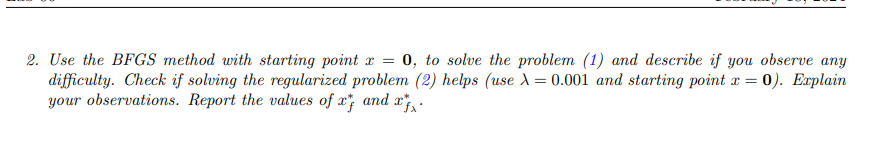

In [ ]:
y=digits.target

In [ ]:
# y = 1.0* np . ones ([ A . shape [0] ,1])
# for i in range ( digits . target . shape [0]) :
#   y [ i ] = digits . target [ i ]

In [ ]:
def f(x,A,y):
  return np.linalg.norm(A@x-y)**2/2

def grad_f(x,A,y):
  return (A.transpose()@A)@x - A.transpose()@y

def hessian(x,A):
  return A.transpose()@A

In [ ]:

def get_alpha_bfgs(xk,A,y, alpha0, rho, gamma, Bk):
  alpha = alpha0
  pk = -grad_f(xk,A,y)
  while f(xk + alpha*Bk@pk,A,y) > (f(xk,A,y) + gamma*alpha*grad_f(xk,A,y)@Bk@pk):
    alpha = rho*alpha
  return alpha


def bfgs(x0,A,y, tau, alpha0, rho, gamma, max_iter=300):
  #start_time = time.time()
  xk = np.copy(x0)
  n = len(x0)
  Bk = np.eye(n)
  count = 0
  pk = grad_f(xk,A,y)
  xks = []
  xks.append(xk)
  while (np.linalg.norm(pk)>tau):
    if count > max_iter:
      break

    alpha = get_alpha_bfgs(xk,A,y ,alpha0, rho, gamma, Bk)
    xnext = xk - alpha*(Bk@pk)


    sk = xnext - xk
    yk = grad_f(xnext,A,y) - grad_f(xk,A,y)

    Bk = np.dot((np.eye(len(xk)) - np.outer(sk, yk) / np.dot(yk, sk)), np.dot(Bk, (np.eye(len(xk)) - np.outer(yk, sk) / np.dot(yk, sk)))) + np.outer(sk, sk) / np.dot(yk, sk)

    xk = xnext
    pk = grad_f(xk,A,y)

    xks.append(xk)
    count += 1

  #end_time = time.time()
  #time_elapsed = end_time - start_time
  return count, xk, f(xk,A,y), xks #time_elapsed

In [ ]:
import time
start = time.time()
alpha0 = 0.99
rho = 0.5
gamma = 0.5
tau=1e-5

x0=[i for i in range(64)]
iteration,minimizers,optimal,all_x=bfgs(x0,A,y,tau, alpha0, rho, gamma)
bfgstime = time.time() - start
print('iteration:',iteration)
print('minimizers:',minimizers)
print('optimal_value_of_f:',optimal)
print('BFGS time:',bfgstime)

iteration: 71
minimizers: [ 0.00000000e+00  9.69033567e-02 -4.32277230e-03 -7.76028319e-03
  7.49594380e-02  1.13947198e-02 -2.71328245e-02 -7.33176330e-03
  9.98337970e-01 -2.88095538e-02  1.18688288e-01  6.60916265e-02
 -5.57069862e-02 -6.97063705e-02  9.65876439e-02  2.55182251e-01
 -7.29828618e-01  2.42709916e-02  7.73249596e-02 -2.33000278e-02
 -5.64086144e-02  5.72426822e-02 -4.88717684e-02 -2.62467762e-01
 -9.06562802e-01 -1.49767791e-01  5.64019538e-02  8.96663590e-02
  8.39318159e-02  9.85411936e-02  1.69317615e-03 -2.96805759e+00
  3.20000000e+01 -1.54362338e-01 -9.32361207e-03  1.39497628e-01
 -3.69234835e-02  5.46111776e-02 -9.20505069e-03  3.90000000e+01
  1.03279535e-01  1.23983258e-01 -1.37639605e-02  5.40087816e-03
  1.31185107e-01  5.49570758e-02  2.24938237e-02  7.47977912e-03
  6.17755031e-01  2.44122357e-02  1.42333037e-03 -6.21110760e-02
 -2.07025036e-01 -3.38506003e-02  1.05486736e-01 -1.40335958e-01
 -9.84169013e-01 -1.14467153e-01  2.10494893e-02 -4.36076105e-02

In [ ]:
def f(x,A,y, lamda):
  return 0.5*np.linalg.norm(A@x-y)**2 + 0.5*lamda*np.dot(x,x)

def grad_f(x,A,y, lamda):
  return np.dot(A.transpose(), A)@x - A.transpose()@y + lamda*x

def hessian(x,A,lamda):
  return A.transpose()@A + lamda*np.identity(A.shape[1])

In [ ]:
def get_alpha_bfgs(xk,A,y, alpha0, rho, gamma, Bk,lamda):
  alpha = alpha0
  pk = -grad_f(xk,A,y,lamda)
  while f(xk + alpha*Bk@pk,A,y,lamda) > (f(xk,A,y,lamda) + gamma*alpha*grad_f(xk,A,y,lamda)@Bk@pk):
    alpha = rho*alpha
  return alpha


def bfgs(x0,A,y, tau, alpha0, rho, gamma, lamda):
  #start_time = time.time()
  max_iter=300
  xk = np.copy(x0)
  n = len(x0)
  Bk = np.eye(n)
  count = 0
  pk = grad_f(xk,A,y,lamda)
  xks = []
  xks.append(xk)
  while (np.linalg.norm(pk)>tau):
    if count > max_iter:
      break

    alpha = get_alpha_bfgs(xk,A,y ,alpha0, rho, gamma, Bk,lamda)
    xnext = xk - alpha*(Bk@pk)


    sk = xnext - xk
    yk = grad_f(xnext,A,y,lamda) - grad_f(xk,A,y,lamda)

    Bk = np.dot((np.eye(len(xk)) - np.outer(sk, yk) / np.dot(yk, sk)), np.dot(Bk, (np.eye(len(xk)) - np.outer(yk, sk) / np.dot(yk, sk)))) + np.outer(sk, sk) / np.dot(yk, sk)

    xk = xnext
    pk = grad_f(xk,A,y,lamda)

    xks.append(xk)
    count += 1

  #end_time = time.time()
  #time_elapsed = end_time - start_time
  return count, xk, f(xk,A,y,lamda), xks #time_elapsed
import time
bfgstime_list=[]
lamdalist = [1e-3]
for lamda in lamdalist:
  start = time.time()
  alpha0 = 0.99
  rho = 0.5
  gamma = 0.5
  tau=1e-5
  x0=[i for i in range(64)]
  iteration,minimizers,optimal,all_x=bfgs(x0,A,y,tau, alpha0, rho, gamma,lamda)
  bfgstime = time.time() - start
  bfgstime_list.append(bfgstime)
  print('iteration:',iteration)
  print('minimizers:',minimizers)
  print('optimal_value_of_f:',optimal)

iteration: 81
minimizers: [ 0.00000000e+00  9.69076881e-02 -4.32192762e-03 -7.75916339e-03
  7.49591987e-02  1.13946582e-02 -2.71293921e-02 -7.34410663e-03
  9.98267907e-01 -2.88089376e-02  1.18688356e-01  6.60922719e-02
 -5.57075915e-02 -6.97056149e-02  9.65844014e-02  2.55196013e-01
 -7.29830665e-01  2.42711745e-02  7.73241544e-02 -2.33008498e-02
 -5.64077619e-02  5.72413971e-02 -4.88675248e-02 -2.62555997e-01
 -9.06071169e-01 -1.49769638e-01  5.64022790e-02  8.96665319e-02
  8.39315938e-02  9.85410047e-02  1.69269848e-03 -2.96649688e+00
  4.09277875e-09 -1.54361470e-01 -9.32404640e-03  1.39497978e-01
 -3.69237437e-02  5.46111773e-02 -9.20425586e-03  4.98502353e-09
  1.03326506e-01  1.23983484e-01 -1.37635230e-02  5.40029022e-03
  1.31185700e-01  5.49577815e-02  2.24935899e-02  7.48046265e-03
  6.17507774e-01  2.44100619e-02  1.42356436e-03 -6.21114801e-02
 -2.07024631e-01 -3.38510517e-02  1.05486785e-01 -1.40336482e-01
 -9.82347832e-01 -1.14473639e-01  2.10485230e-02 -4.36083412e-02

 The provided dataset is singular, both problems may pose difficulties in convergence due to ill-conditioning. We'll observe if using regularization it helps alleviate these difficulties in problem . So in regulisation we may get deviate from our results some how but we observe that we converge towards our optimal value. In newton we get faster solution in case of regulisation whereas we get solution in both case in bfgs but number of iteration are large as compare to newton but we converge to our optimal value . And difference of iteration will be observed after applying reguliser term.